# TMA4320 V2019 - Programmeringsoppgave, prøveeksamen

I denne oppgaven skal du implementere den klassiske fjerde ordens Runge-Kutta metoden (Kutta 1901) med konstant skrittlengde, og teste den ut på et angitt problem.

Metoden, også oppgitt i formelarket, kan skrives over ett skritt som

\begin{align*}
  F_1 &= f(t_n,y_n) \\
  F_2 &= f(t_n+\frac{h}{2},y_n+\frac{h}{2}F_1) \\
  F_3 &= f(t_n+\frac{h}{2}, y_n + \frac{h}{2} F_2) \\
  F_4 &= f(t_n+h, y_n + h F_3) \\
  y_{n+1} &= y_n + \frac{h}{6}(F_1+2F_2+2F_3+F_4)
\end{align*}

der $h$ er skrittlengden $t_{n+1}-t_n$ som altså holdes konstant for alle $n$.

Vi skal løse et Lotka-Volterra (rovdyr-byttedyr) problem som kan skrives som

\begin{align*}
u' &= u(v-2),& u(0)&=u_0 \\
v' &=  v(1-u), & v(0)&= v_0
\end{align*}

**Oppgave** 

**(a)** Skriv en funksjon Kutta4 med 

Input
* f: En funksjon f(t,y) som definerer differensialligningen. t er en skalar og y et numpy array, se i/o def under **(b)**
* t0: Startverdien for t.
* y0: Startverdien for y y(t0)=y0 (numpy array)
* h: Skrittlengde (konstant for alle skritt)
* nsteps: Antall skritt som skal tas

Output
* T: numpy array av lengde nsteps+1 der [t0,t1,...,t(nsteps)] er lagret
* Y: numpy array i 2d av størrelse (nsteps+1,m) der m er antall komponenter i y.

**(b)** Skriv rutinen f som definerer differensialligningen

Input
* t: skalar (tid)
* y: numpy array som representerer løsning ved tid t

Output
* yd: numpy array som angir den deriverte yd=f(t,y)

**(c)** Skriv kode som finner løsningen av Lotka-Volterra problemet ovenfor med følgende 
5 valg av startverdier ($u_0, v_0$): $(1,1+0.2\cdot \ell),\ \ell=0,1,2,3,4$. Bruk $h=0.02$ og 
nsteps=250 for alle tilfellene. Plott første mot andre komponent av løsningen, alle 5 kurver i samme plott.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def g(t,y):
    return np.array([y[0]*(y[1]-2),y[1]*(1-y[0])])

def f(t,y):
    return np.array(y[1],-9.81/10*np.sin(y[0]))

def Kutta4(f,t0,y0,h,nsteps):
    t = t0
    y = y0
    T = []
    Y = []
    T.append(t0)
    Y.append(y0)
    for i in range(nsteps):
        k1 = f(t,y)
        k2 = f(t+0.5*h,y + 0.5*h*k1)
        k3 = f(t+h,y+h*k2)
        k4 = f(t+h,y+h*k3)
        y1 = y + h*(k1/6+k2/3+k3/3+k4/6)
        y = y1
        t += h
        Y.append(y)
        T.append(t)
    T = np.array(T)
    Y = np.array(Y)
    return T,Y

t0 = 0
h = 0.02
nsteps = 250

u0s = []

for i in range(0,5):
    u0 = np.array([10 + 5*i,0.1])
    u0s.append(u0)


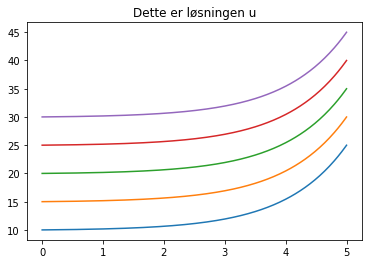

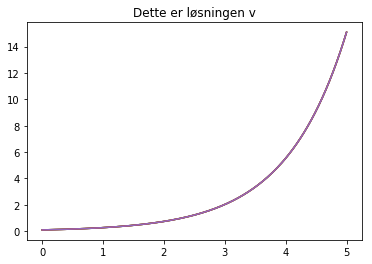

In [35]:
T0,Y0 = Kutta4(f,t0,u0s[0],h,nsteps)
T1,Y1 = Kutta4(f,t0,u0s[1],h,nsteps)
T2,Y2 = Kutta4(f,t0,u0s[2],h,nsteps)
T3,Y3 = Kutta4(f,t0,u0s[3],h,nsteps)
T4,Y4 = Kutta4(f,t0,u0s[4],h,nsteps)

plt.plot(T0,Y0[:,0])
plt.plot(T1,Y1[:,0])
plt.plot(T2,Y2[:,0])
plt.plot(T3,Y3[:,0])
plt.plot(T4,Y4[:,0])
plt.title("Dette er løsningen u")
plt.show()

plt.plot(T0,Y0[:,1])
plt.plot(T1,Y1[:,1])
plt.plot(T2,Y2[:,1])
plt.plot(T3,Y3[:,1])
plt.plot(T4,Y4[:,1])
plt.title("Dette er løsningen v")
plt.show()